# Métodos Numéricos 

## Guía 2: Solución de ecuaciones de una variable (Abril 2022)

In [5]:
using Pkg
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [6]:
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [7]:
Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [2]:
using Plots
using LaTeXStrings
using DataFrames # Recuerde instalar este paquete ingresando en una celda: using Pkg; Pkg.add("DataFrames")

# Problema 1.A

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el método de la **bisección**.
El programa debe tomar como datos de entrada:

* la función $f:\mathbb{R}\to \mathbb{R}$, 

* el intervalo inicial $[a,b]$, 

* la máxima tolerancia permitida $\varepsilon_x$ del error relativo a la aproximación de la única raíz $x$ en $[a,b]$,

* la máxima tolerancia permitida $\varepsilon_f$ al valor de $|f(p)|$ para la presupuesta mejor aproximación $p$ que el algoritmo genere,

* y el número máximo $n_{\max}$ de iteraciones permitidas.

En cada iteración, el programa debe imprimir la siguiente información:

* un booleano indicando si el algoritmo convergió o no dentro de las tolerancias máximas permitidas,

* el número de iteración $i$,

* la correspondiente aproximación de la raíz $p_i$,

* el valor $f_i:=f(p_i)$,

* las cota $c_i:=|b_i-a_i|/2$ del correspondiente error absoluto $|x-p_i|$,

* y la estimación $r_i:=c_i/|p_{i}|$ del correspondiente error relativo $|x-p_i|/|x|$.

El programa debe deternerse si se cumple:

$$
(r_i<\varepsilon_x \;\; \text{AND} \;\; |f_i|<\varepsilon_f) \;\; \text{OR} \;\; n=n_{\max}
$$

Tambien debe trabajar con números de precisión suficientemente alta como para obtener resultados con 12 cifras significativas en los reales (ej. `Float64`).

In [3]:
function biseccion(f,intervalo;tol_x=1e-5,tol_f=1e-5,nmax=100)       ### ; variables opcionales del punto y coma para la derecha 
    a,b = intervalo                  ### T Una tupla es una secuencia de valores, pueden ser de cualquier tipo y están indexados por enteros. Las tuplas son inmutables y que cada elemento puede tener su propio tipo. Una tupla es una lista de valores separados por comas
        if b<a
           a,b=b,a     ### El lado izquierdo es una tupla de variables y el lado derecho es una tupla de expresiones. Cada valor se asigna a su respectiva variable. Todas las expresiones del lado derecho se evalúan antes de las asignaciones.
        end
    fa = f(a)                    ### Para que quede guardado el valor de f(a) y no calcular de nuevo
    @assert fa*f(b)<0.       ### Usar una macro @assert, que verifica un invariante dado y genera una excepción si falla
    println("i p    f    c   r")
    for i in 1:nmax
        p = a + 0.5*(b-a)
        fp = f(p)
        c = 0.5*(b-a)      ### cota error absoluto
        r = abs(c/p)       ### cota error relativo
        println("$i $p $fp $c $r")
        if  r<tol_x && abs(fp)<tol_f 
         return
        end
        if fa*fp<0.  b = p
            else 
                a = p
                fa = fp
            end
        end
    end

biseccion (generic function with 1 method)

### Problema 1.B

1. Encontrar una aproximación a $\sqrt{3}$ con un error (relativo en $x$ y absoluto en $y$) menor a $10^{-5}$. Para ello, 

    a. Note que $\sqrt{3}$ es la raíz positiva de la ecuación $f(x)=x^2-3$.

    b. Grafique $f(x)$ vs $x$ en el intervalo para determinar que tiene una raíz $x\in [1,2]$.
    
    d. Utilice el programa desarrollado en **1.A** y responda: Cuanto vale la presunta mejor aproximación $p_n$? Cuántas iteraciones fueron necesarias?
    
    e. Calcule los valores exactos del error absolutos y del error relativo comparando el resultado $p_n$ con el "analítico".

2. Encontrar la menor solución positiva de la ecuación $f(x)=\tan(x)-2x$ con un error (relativo en $x$ y absoluto en $y$) menor a $10^{-5}$. Para ello, repita lo realizado en el inciso 1. (con excepción del inciso e., ya que no podemos calcular el valor analítico) considerando el intérvalo $x\in [0.8,1.4]$.

In [645]:
f(x)=x^2-3

f (generic function with 1 method)

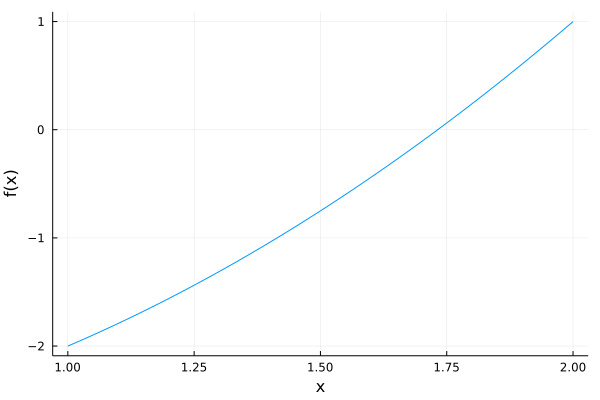

In [646]:
a,b=1,2
plot(a:0.01:b,f,xlabel="x",ylabel="f(x)",label="")

In [647]:
biseccion(f,(a,b))

i p    f    c   r
1 1.5 -0.75 0.5 0.3333333333333333
2 1.75 0.0625 0.25 0.14285714285714285
3 1.625 -0.359375 0.125 0.07692307692307693
4 1.6875 -0.15234375 0.0625 0.037037037037037035
5 1.71875 -0.0458984375 0.03125 0.01818181818181818
6 1.734375 0.008056640625 0.015625 0.009009009009009009
7 1.7265625 -0.01898193359375 0.0078125 0.004524886877828055
8 1.73046875 -0.0054779052734375 0.00390625 0.002257336343115124
9 1.732421875 0.001285552978515625 0.001953125 0.0011273957158962795
10 1.7314453125 -0.0020971298217773438 0.0009765625 0.0005640157924421884
11 1.73193359375 -0.00040602684020996094 0.00048828125 0.000281928390188892
12 1.732177734375 0.00043970346450805664 0.000244140625 0.00014094432699083862
13 1.7320556640625 1.6823410987854004e-5 0.0001220703125 7.047713017125943e-5
14 1.73199462890625 -0.00019460543990135193 6.103515625e-5 3.5239806885858265e-5
15 1.732025146484375 -8.889194577932358e-5 3.0517578125e-5 1.761959298740199e-5
16 1.7320404052734375 -3.603450022637844e-5 

**Mejor aproximacion de pn = 1.7320480346679688 con n = 14**

In [648]:
println("Error absoluto exacto y Error relativo exaxto")
exacto=[abs(sqrt(3)-1.7320480346679688), abs(sqrt(3)-1.7320480346679688)/1.7320480346679688]

Error absoluto exacto y Error relativo exaxto


2-element Vector{Float64}:
 2.7729009084431766e-6
 1.6009376489230785e-6

In [649]:
error_metodo=[7.62939453125e-6, 4.404840038234012e-6]
exacto-error_metodo

2-element Vector{Float64}:
 -4.856493622806823e-6
 -2.8039023893109336e-6

**2.**

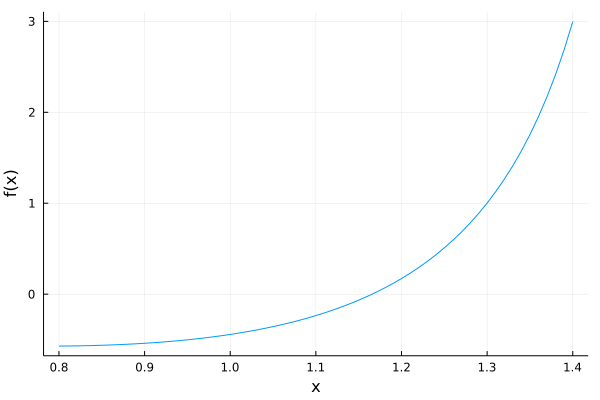

In [650]:
f(x)=tan(x)-2x
a,b=0.8,1.4
plot(a:0.01:b,f,xlabel="x",ylabel="f(x)",label="")

In [651]:
biseccion(f,(a,b))

i p    f    c   r
1 1.1 -0.23524034275134786 0.29999999999999993 0.27272727272727265
2 1.25 0.5095696738628313 0.1499999999999999 0.11999999999999993
3 1.175 0.04322115170504448 0.07499999999999996 0.0638297872340425
4 1.1375000000000002 -0.11338341785151274 0.03749999999999998 0.03296703296703294
5 1.15625 -0.0400159397525508 0.018749999999999933 0.016216216216216158
6 1.165625 0.00028302427270565644 0.009375000000000022 0.008042895442359269
7 1.1609375 -0.020185004783326743 0.004687499999999956 0.004037685060565238
8 1.1632812499999998 -0.010032004802337458 0.002343749999999978 0.002014775016789773
9 1.1644531249999999 -0.004894919598906977 0.0011718750000000444 0.0010063737001006756
10 1.1650390625 -0.0023110771806220676 0.0005859375000000222 0.0005029337803856016
11 1.16533203125 -0.0010153116203532875 0.0002929687499999556 0.0002514036704935511
12 1.1654785156249998 -0.0003664653146806529 0.0001464843749999778 0.00012568603628135012
13 1.1655517578124999 -4.1800974913908107e-5 7.3

In [652]:
println("Error absoluto exacto y Error relativo exacto")
exacto=[abs(sqrt(3)-1.1655609130859372), abs(sqrt(3)-1.1655609130859372)/1.1655609130859372]

Error absoluto exacto y Error relativo exacto


2-element Vector{Float64}:
 0.56648989448294
 0.48602341424018947

In [653]:
error_metodo=[9.155273437477796e-6, 7.854821944258844e-6]
exacto-error_metodo

2-element Vector{Float64}:
 0.5664807392095025
 0.4860155594182452

In [654]:
f(1.1655609130859372),f(sqrt(3))

(-1.2066204040372952e-6, -9.611634775434377)

**sqrt(3) no es raiz de** $f(x)=tan(x)-2x$

### Problema 1.C

Modique al programa desarrollado en el inciso **1.A** de manera tal que, en vez de imprimir los valores obtenidos a lo largo de las diferentes iteraciones, retorne una tupla con las siguientes componentes:

* un booleano indicando si el algoritmo convergió o no dentro de las tolerancias máximas permitidas,

* un vector de componentes $p_i$ para $i=1,2,...,n$, donde $n$ es el número de iteraciones realizadas por el algoritmo y, por ende, $p_n$ es la presunta mejor aproximación obtenida.

* un vector $f$ de componentes $f_i$,

* un vector $c$ de componentes $c_i$,

* y un vector $r$ de componentes $r_i$.

In [4]:
function biseccion(f,(a,b);tol_x=1e-10,tol_f=1e-10,nmax=100)      
        if b<a              
            a,b=b,a
        end
    Vp = zeros(nmax)
    Vf = zeros(nmax)
    Vc = zeros(nmax)
    Vr = zeros(nmax)
    fa = f(a)                    
    @assert fa*f(b)<0.     
    for i in 1:nmax
        p = a + 0.5*(b-a)
        fp = f(p)
        c = 0.5*(b-a)      ### cota error absoluto
        r = abs(c/p)       ### cota error relativo
        Vp[i] = p
        Vf[i] = fp
        Vc[i] = c
        Vr[i] = r
        if  r<tol_x && abs(fp)<tol_f   
             return (true,Vp[1:i],Vf[1:i],Vc[1:i],Vr[1:i])
        end
        if fa*fp<0.  
            b = p
        else 
                a = p
                fa = fp
        end
    end
    return false,Vp,Vf,Vc,Vr
end

biseccion (generic function with 1 method)

### Problema 1.D

Utilize el programa desarrollado en el inciso **1.C** para:

1. Encontrar nuevamente la a $\sqrt{3}$. Luego:
  
    a. Imprima una lista con los valores $i$, $p_i$, $f_i$, $d_i$ y $r_i$  para $i=1,...,n$. Utilice el paquete `DataFrames`.
    
    b. Grafique $p_i$ vs $i$ usando puntos (en vez de una línea contínua).
    
    c. Grafique $f(p_i)$ vs $i$ usando puntos y escala logarítmica en el eje de las ordenadas. Recuerde, la abscisa es el eje $x$ y la ordenada el eje $y$.
    
    d. Grafique, con puntos de un color los errores absolutos, y con puntos de otro color los errores relativos, ambos vs $i$ y con escala logarítimica en el eje de las ordenadas.

Recuerde de poner título, nombre a los ejes y leyendas para las distintas curvas.

2. Encontrar nuevamente la menor solución positiva de la ecuación $f(x)=\tan(x)-2x$ y repita los incisos items del inciso anterior.

**1.a.**

In [661]:
f(x)=x^2-3
a,b=1,2
biseccion(f,(a,b))    ## Muestra en pantalla el resultado pero no queda guardado los vectores, despues de correr el programa elimina la variables 
conv,Vp,Vf,Vc,Vr = biseccion(f,(a,b))       ## le asigno una tupla a lo que me entrega el programa

(true, [1.5, 1.75, 1.625, 1.6875, 1.71875, 1.734375, 1.7265625, 1.73046875, 1.732421875, 1.7314453125, 1.73193359375, 1.732177734375, 1.7320556640625, 1.73199462890625, 1.732025146484375, 1.7320404052734375, 1.7320480346679688], [-0.75, 0.0625, -0.359375, -0.15234375, -0.0458984375, 0.008056640625, -0.01898193359375, -0.0054779052734375, 0.001285552978515625, -0.0020971298217773438, -0.00040602684020996094, 0.00043970346450805664, 1.6823410987854004e-5, -0.00019460543990135193, -8.889194577932358e-5, -3.603450022637844e-5, -9.605602826923132e-6], [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-5, 3.0517578125e-5, 1.52587890625e-5, 7.62939453125e-6], [0.3333333333333333, 0.14285714285714285, 0.07692307692307693, 0.037037037037037035, 0.01818181818181818, 0.009009009009009009, 0.004524886877828055, 0.002257336343115124, 0.0011273957158962795, 0.0005640157924421884, 0.0002819283901

In [662]:
Vp

17-element Vector{Float64}:
 1.5
 1.75
 1.625
 1.6875
 1.71875
 1.734375
 1.7265625
 1.73046875
 1.732421875
 1.7314453125
 1.73193359375
 1.732177734375
 1.7320556640625
 1.73199462890625
 1.732025146484375
 1.7320404052734375
 1.7320480346679688

In [663]:
n=length(Vp)   ## numero de iteraciones

17

In [664]:
tabla = DataFrame(p=Vp,f=Vf,e_x=Vc,e_r=Vr)

,p,f,e_x,e_r
,Float64,Float64,Float64,Float64
1,1.5,-0.75,0.5,0.333333
2,1.75,0.0625,0.25,0.142857
3,1.625,-0.359375,0.125,0.0769231
4,1.6875,-0.152344,0.0625,0.037037
5,1.71875,-0.0458984,0.03125,0.0181818
6,1.73438,0.00805664,0.015625,0.00900901
7,1.72656,-0.0189819,0.0078125,0.00452489
8,1.73047,-0.00547791,0.00390625,0.00225734
9,1.73242,0.00128555,0.00195312,0.0011274


**1.b.**

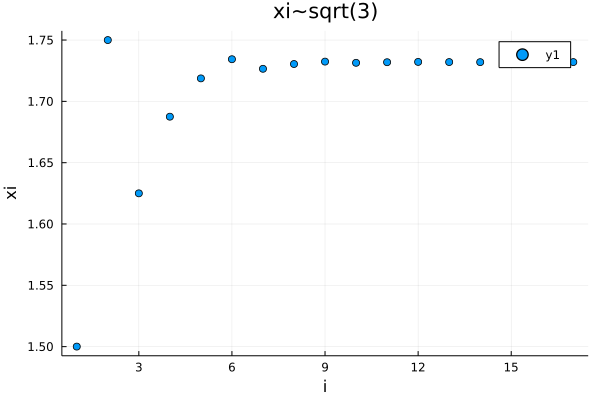

In [665]:
scatter(Vp, title="xi~sqrt(3)",xlabel="i", ylabel="xi")

**1.c.**

In [666]:
scatter(Vf, yscale=:log10, ylim=(-1,0.5), title="fi vs i", ylabel="fi en escala logaritmica", xlabel="i")

┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: Invalid negative or zero value -0.75 found at series index 1 for log10 based yscale
└ @ Plots /home/rdpaula/.julia/packages/Plots/dNEbX/src/utils.jl:95


**1.d.**

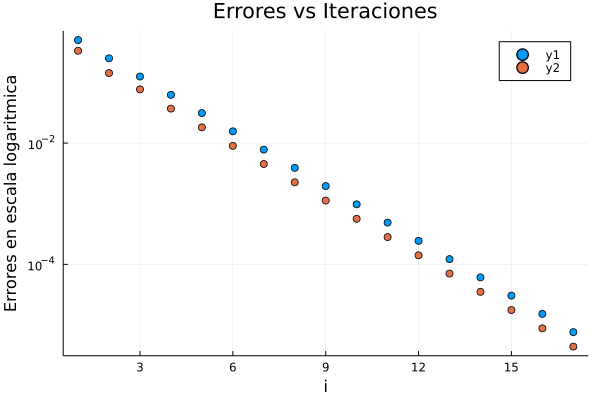

In [667]:
scatter(Vc, yscale=:log10, title="Errores vs Iteraciones", ylabel="Errores en escala logaritmica", xlabel="i")
scatter!(Vr)

**2.a.**

In [668]:
f(x)=tan(x)-2x
a,b=0.8,1.4
conv,Vp,Vf,Vc,Vr = biseccion(f,(a,b))   

(true, [1.1, 1.25, 1.175, 1.1375000000000002, 1.15625, 1.165625, 1.1609375, 1.1632812499999998, 1.1644531249999999, 1.1650390625, 1.16533203125, 1.1654785156249998, 1.1655517578124999, 1.16558837890625, 1.1655700683593748, 1.1655609130859372], [-0.23524034275134786, 0.5095696738628313, 0.04322115170504448, -0.11338341785151274, -0.0400159397525508, 0.00028302427270565644, -0.020185004783326743, -0.010032004802337458, -0.004894919598906977, -0.0023110771806220676, -0.0010153116203532875, -0.0003664653146806529, -4.1800974913908107e-5, 0.00012059152994714495, 3.939024846255634e-5, -1.2066204040372952e-6], [0.29999999999999993, 0.1499999999999999, 0.07499999999999996, 0.03749999999999998, 0.018749999999999933, 0.009375000000000022, 0.004687499999999956, 0.002343749999999978, 0.0011718750000000444, 0.0005859375000000222, 0.0002929687499999556, 0.0001464843749999778, 7.324218750004441e-5, 3.6621093750022204e-5, 1.8310546875066613e-5, 9.155273437477796e-6], [0.27272727272727265, 0.1199999999

In [669]:
DataFrame(p=Vp,f=Vf,e_x=Vc,e_r=Vr)

,p,f,e_x,e_r
,Float64,Float64,Float64,Float64
1,1.1,-0.23524,0.3,0.272727
2,1.25,0.50957,0.15,0.12
3,1.175,0.0432212,0.075,0.0638298
4,1.1375,-0.113383,0.0375,0.032967
5,1.15625,-0.0400159,0.01875,0.0162162
6,1.16562,0.000283024,0.009375,0.0080429
7,1.16094,-0.020185,0.0046875,0.00403769
8,1.16328,-0.010032,0.00234375,0.00201478
9,1.16445,-0.00489492,0.00117188,0.00100637


**2.b.**

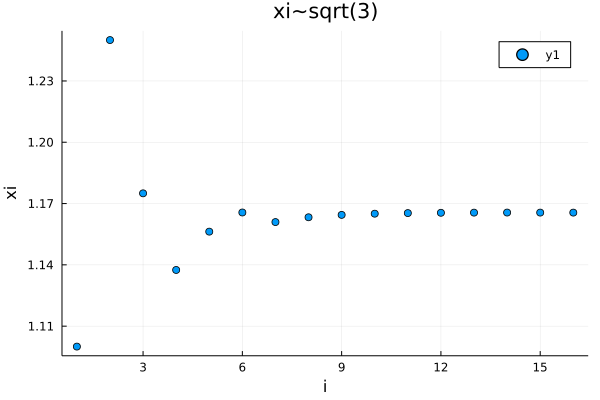

In [670]:
scatter(Vp, title="xi~sqrt(3)",xlabel="i", ylabel="xi")

**2.c**

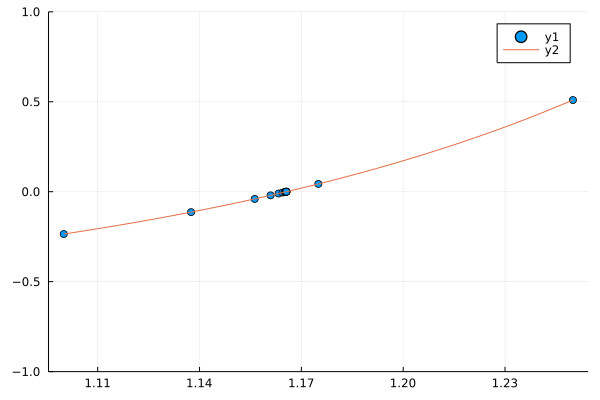

In [672]:
scatter(Vp,Vf,ylim=(-1,1))     ### scatter(x,f(x))  ---> f(x) vs x
plot!(f)

In [673]:
scatter(Vf, yscale=:log10, ylim=(-1,1), title="fi vs i", ylabel="fi en escala logaritmica", xlabel="i")

┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: Invalid negative or zero value -0.23524034275134786 found at series index 1 for log10 based yscale
└ @ Plots /home/rdpaula/.julia/packages/Plots/dNEbX/src/utils.jl:95


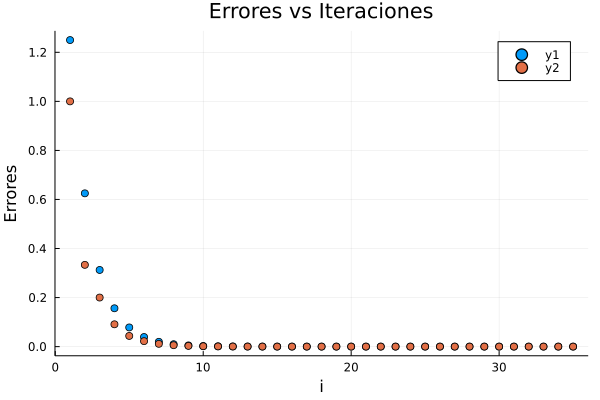

In [17]:
scatter(Vc, title="Errores vs Iteraciones", ylabel="Errores", xlabel="i")
scatter!(Vr)
hline!(0)

In [675]:
Vc-Vr

16-element Vector{Float64}:
 0.027272727272727282
 0.029999999999999985
 0.011170212765957449
 0.004532967032967038
 0.0025337837837837753
 0.0013321045576407536
 0.0006498149394347178
 0.00032897498321020477
 0.00016550129989936877
 8.300371961442057e-5
 4.156507950640447e-5
 2.0798338718627676e-5
 1.0403118356083887e-5
 5.202546334178678e-6
 2.6010263819399754e-6
 1.3004514932189519e-6

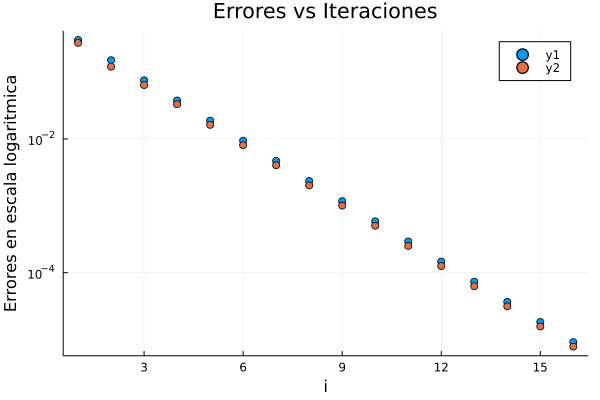

In [676]:
scatter(Vc, yscale=:log10, title="Errores vs Iteraciones", ylabel="Errores en escala logaritmica", xlabel="i")
scatter!(Vr)

### Problema 2

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el método de Newton (también conocido como Newton-Raphson).
El programa debe tomar como datos de entrada la función $f:\mathbb{R}\to \mathbb{R}$, su derivada $f':\mathbb{R}\to \mathbb{R}$, una estimación inicial $p_1$ de la raíz $x$, la tolerancia $\varepsilon_x$ a la estimación $r_i:=\frac{|p_{i+1} - p_{i}|}{|p_{i+1}|}$ del error relativo $|x-p_i|/|x|$ en la iteración $i$ para $i=1,2,...,n$, la tolerancia en $\varepsilon_f$ al valor absoluto de $f_i:=f(p_{i})$ y el número máximo de iteraciones permitido $n_{\max}$.
El programa debe retornar una tupla con las siguientes componentes:

* Un booleano indicando si el algoritmo convergió.

* Un vector de componentes $p_i$ para $i=1,2,...,n$, donde $n$ es el número de iteraciones realizado por el programa.

* Un vector de valores $f_i:=f(p_i)$.

* Un vector de estimaciones $c_i:=|p_{i+1}-p_i|$ de errores absolutos $|x-p_i|$.

* Un vector de estimaciones $r_i:=c_i/|p_{i+1}|$ de errores relativos $|x-p_i|/|x|$.

El programa debe finalizar en la iteración $n$-ésima que satisfaga por vez primera:
$$
\left( r_n < \varepsilon_x \qquad \text{AND} \qquad 
f_n < \varepsilon_f \right) \qquad \text{OR} \qquad
n = n_{\max}
$$
y debe poder utlizar 13 cifras significativas para las variables reales (ej. `Float64`).

Utilice este programa para resolver los incisos 1 y 2 del problema **1.B** usando $p_1=1$ en ambos casos. No hace falta graficar $f(x)$ vs $x$. Compare la cantidad de iteraciones $n$, la cantidad de evaluaciones de la función $f$ y su derivada $f'$ en los dos métodos.

In [5]:
function Newton_Raphson(f,df,p;tol_x=1e-10,tol_f=1e-10,n_max=50)
    Vp=zeros(n_max)
    Vf=zeros(n_max)
    Vc=zeros(n_max)
    Vr=zeros(n_max)
    for i in 1:n_max
        p1=p
        p+=-f(p)/df(p)         ###  p=p-f(p)/df(p)
        Vp[i]=p
        Vf[i]=f(p)
        Vc[i]=abs(p-p1)
        Vr[i]=Vc[i]/abs(p)
        if Vr[i]<tol_x && Vf[i]<tol_f         ### como entiente el programa (P ^ Q) v S ó P ^ (Q v S)
            return (true,Vp[1:i],Vf[1:i],Vc[1:i],Vr[1:i])
        end
    end
    return false,Vp,Vf,Vc,Vr
end

Newton_Raphson (generic function with 1 method)

In [6]:
f(x)=x^2-3
df(x)=2x
p=1
comv,Vp,Vf,Vc,Vr = Newton_Raphson(f,df,p)

(true, [2.0, 1.75, 1.7321428571428572, 1.7320508100147276, 1.7320508075688772, 1.7320508075688774], [1.0, 0.0625, 0.00031887755102077975, 8.47267411785424e-9, -4.440892098500626e-16, 4.440892098500626e-16], [1.0, 0.25, 0.017857142857142794, 9.204712812960203e-5, 2.445850411092465e-9, 2.220446049250313e-16], [0.5, 0.14285714285714285, 0.010309278350515427, 5.3143434128713205e-5, 1.4121123932417916e-9, 1.2819751242557092e-16])

In [512]:
Vp

5-element Vector{Float64}:
 2.0
 1.75
 1.7321428571428572
 1.7320508100147276
 1.7320508075688772

**pn = 1.7320508075688772 con n = 5**

In [508]:
println("Error absoluto exacto y Error relativo exacto")
abs(sqrt(3)-1.7320508075688772), abs(sqrt(3)-1.7320508075688772)/1.7320508075688772

Error absoluto exacto y Error relativo exacto


(0.0, 0.0)

In [509]:
sqrt(3)-Vp[5]

0.0

**Es igual a la aproximacion de Julia**

In [525]:
f(x)=tan(x)-2x
df(x)=sec(x)^2-2
p=1
comv,Vp,Vf,Vc,Vr = Newton_Raphson(f,df,p)

(true, [1.3104780300916217, 1.2239290964998213, 1.1760509000038353, 1.1659265083113628, 1.1655616363485986, 1.1655611852078998], [1.133327685248926, 0.31852867701817456, 0.048207117932219656, 0.001621894244293376, 2.000423291459441e-6, 3.0526692285093304e-12], [0.31047803009162167, 0.08654893359180038, 0.047878196495986014, 0.010124391692472479, 0.00036487196276424605, 4.5114069879836904e-7], [0.23691967584524457, 0.07071400936484969, 0.040710990056493195, 0.008683559058225598, 0.0003130439020859463, 3.8705878723809733e-7])

In [526]:
Vp

6-element Vector{Float64}:
 1.3104780300916217
 1.2239290964998213
 1.1760509000038353
 1.1659265083113628
 1.1655616363485986
 1.1655611852078998

In [527]:
println("Error absoluto exacto y Error relativo exacto")
abs(sqrt(3)-1.1655611852078998), abs(sqrt(3)-1.1655611852078998)/1.1655611852078998

Error absoluto exacto y Error relativo exacto


(0.5664896223609774, 0.4860230673003523)

In [530]:
print("Error absoluto")
Vr[6]

Error absoluto

3.8705878723809733e-7

In [531]:
print("Error relativo")
Vc[6]

Error relativo

4.5114069879836904e-7

### Problema 3

Compute y grafique en escala log-lineal el error relativo estimado $r_i:=|p_{i+1}-p_i|/|p_{i+1}|$ vs $i$ de las aproximaciones de $\sqrt{3}$ con los métodos de la bisección y Newton, partiendo del intervalo $[0,2.5]$ y del valor inicial $p_1=2.5$, respectivamente. 
Utilice en ambos casos tolerancias $\varepsilon_x=\varepsilon_f=10^{-10}$.

In [7]:
f(x)=x^2-3
a,b=0,2.5
conv,Vp,Vf,Vc,Vr = biseccion(f,(a,b))

(true, [1.25, 1.875, 1.5625, 1.71875, 1.796875, 1.7578125, 1.73828125, 1.728515625, 1.7333984375, 1.73095703125  …  1.7320508137345314, 1.73205079510808, 1.7320508044213057, 1.7320508090779185, 1.732050806749612, 1.7320508079137653, 1.7320508073316887, 1.732050807622727, 1.7320508074772079, 1.7320508075499674], [-1.4375, 0.515625, -0.55859375, -0.0458984375, 0.228759765625, 0.08990478515625, 0.0216217041015625, -0.012233734130859375, 0.004670143127441406, -0.0037877559661865234  …  2.1358452340081158e-8, -4.316546808880162e-8, -1.090350787436023e-8, 5.227472232860464e-9, -2.838017820749883e-9, 1.1947269840106856e-9, -8.216454183695987e-10, 1.8654100486514835e-10, -3.175522067522252e-10, -6.550582298814334e-11], [1.25, 0.625, 0.3125, 0.15625, 0.078125, 0.0390625, 0.01953125, 0.009765625, 0.0048828125, 0.00244140625  …  3.725290298461914e-8, 1.862645149230957e-8, 9.313225746154785e-9, 4.6566128730773926e-9, 2.3283064365386963e-9, 1.1641532182693481e-9, 5.820766091346741e-10, 2.9103830456

In [683]:
scatter(0:34,Vr,xlabel="i",ylabel="Error Relatiivo",label="Biseccion",yscale=:log10,ylim=(-0.1,1.1))

┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191


In [682]:
Vr

35-element Vector{Float64}:
 1.0
 0.3333333333333333
 0.2
 0.09090909090909091
 0.043478260869565216
 0.022222222222222223
 0.011235955056179775
 0.005649717514124294
 0.0028169014084507044
 0.0014104372355430183
 0.0007047216349541931
 0.00035248501938667606
 0.0001762114537444934
 ⋮
 8.603188840769342e-8
 4.3015946054218244e-8
 2.1507973489702038e-8
 1.075398686049925e-8
 5.376993401337567e-9
 2.688496693440769e-9
 1.344248348527388e-9
 6.721241738119432e-10
 3.360620870189093e-10
 1.680310434812202e-10
 8.401552174766872e-11
 4.2007760872069706e-11

In [412]:
f(x)=x^2-3
df(x)= 2x
p=2.5
conv,Vp,Vf,Vc,Vr = Newton_Raphson(f,df,p)

(true, [0.0, 1.85, 1.7358108108108108, 1.7320548799091033, 1.7320508075736647, 1.7320508075688772], [0.0, 0.4225000000000003, 0.013039170927684474, 1.4107016938602612e-5, 1.6584067452640738e-11, -4.440892098500626e-16], [0.0, 0.6499999999999999, 0.1141891891891893, 0.0037559309017074494, 4.072335438642938e-6, 4.7875037267886e-12], [0.0, 0.35135135135135126, 0.0657843518878942, 0.0021684826186942514, 2.3511639617244542e-6, 2.764066565407735e-12])

In [413]:
g(x)=0
scatter!(Vr,label="Newton-Rapshon")
plot!(g,label="")

┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191


### Problema 4

Un objeto en caída vertical en el aire está sujeto a la fuerza de gravedad y a la resistencia del aire. Si un objeto de masa $m$ es dejado caer desde una altura $h_0$, su altura luego de $t$ segundos está dada por:
$$
h(t) = h_0 - \frac{mg}{k} t + \frac{m^2 g}{k^2} \left( 1 - e^{-kt/m}\right)
$$
donde $g=9.8\, m/s^2$ y $k$ representa el coeficiente de resistencia del aire en $kg / s$.
Suponga que $h_0 = 10\,m$, $m=0.1\,kg$, y $k=0.149\,kg/s$.
Grafique $h(t)$ para analizar su comportamiento.
Encuentre, con una precisión de $0.01\,s$, el tiempo que le toma a este objeto llegar al suelo. 
Utilice el método de bisección y el de Newton-Raphson.

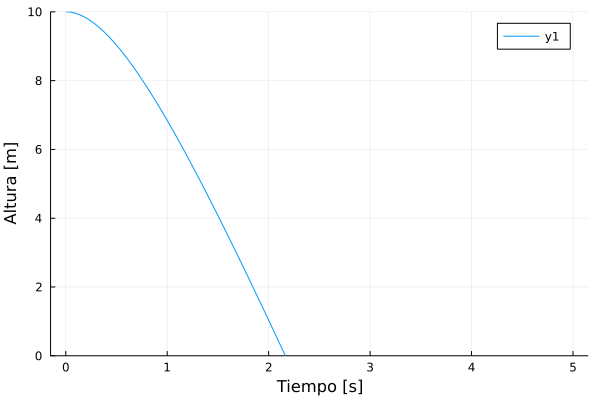

In [684]:
g0= 9.8
h0 = 10.
m = 0.1
k = 0.149
h(t) = h0 - m*g0*t/k + m^2*g0/k^2*(1 - exp(-k*t/m))
plot(0:0.01:5,h,ylim=(0,10),ylabel="Altura [m]",xlabel="Tiempo [s]")

In [707]:
function biseccion_V2(f,(a,b);tol_x=1e-10,tol_f=1e-10,nmax=100)      
        if b<a              
            a,b=b,a
        end
    Vp = zeros(nmax)
    Vf = zeros(nmax)
    Vc = zeros(nmax)
    Vr = zeros(nmax)
    fa = f(a)                    
    @assert fa*f(b)<0.     
    for i in 1:nmax
        p = a + 0.5*(b-a)
        fp = f(p)
        c = 0.5*(b-a)      ### cota error absoluto
        r = abs(c/p)       ### cota error relativo
        Vp[i] = p
        Vf[i] = fp
        Vc[i] = c
        Vr[i] = r
        if  c<tol_x && abs(fp)<tol_f                        ### Con precision menor a c !!!  
             return (true,Vp[1:i],Vf[1:i],Vc[1:i],Vr[1:i])
        end
        if fa*fp<0.  
            b = p
        else 
                a = p
                fa = fp
        end
    end
    return false,Vp,Vf,Vc,Vr
end

biseccion_V2 (generic function with 1 method)

In [708]:
a,b = 1,3
comv,Vp,Vf,Vc,Vr = biseccion_V2(h,(a,b),tol_x=0.01,tol_f=1)

(true, [2.0, 2.5, 2.25, 2.125, 2.1875, 2.15625, 2.171875, 2.1640625], [1.0356426413783142, -2.135177867745959, -0.5389253533968423, 0.2515959688264413, -0.1429289234732538, 0.05452612780503152, -0.04415436099929604, 0.00519777989290926], [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125], [0.5, 0.2, 0.1111111111111111, 0.058823529411764705, 0.02857142857142857, 0.014492753623188406, 0.007194244604316547, 0.0036101083032490976])

In [709]:
tabla3 = DataFrame(t_i=Vp,h_i=Vf,error_abs=Vc,error_rel=Vr)

,t_i,h_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,2.0,1.03564,1.0,0.5
2,2.5,-2.13518,0.5,0.2
3,2.25,-0.538925,0.25,0.111111
4,2.125,0.251596,0.125,0.0588235
5,2.1875,-0.142929,0.0625,0.0285714
6,2.15625,0.0545261,0.03125,0.0144928
7,2.17188,-0.0441544,0.015625,0.00719424
8,2.16406,0.00519778,0.0078125,0.00361011


**Tarda $2.16s$ en llegar al piso (8 iteracones método bisección)**

In [714]:
function Newton_Raphson2(f,df,p;tol_x=1e-10,tol_f=1e-10,n_max=50)
    Vp=zeros(n_max)
    Vf=zeros(n_max)
    Vc=zeros(n_max)
    Vr=zeros(n_max)
    for i in 1:n_max
        p1=p
        p+=-f(p)/df(p)         ###  p=p-f(p)/df(p)
        Vp[i]=p
        Vf[i]=f(p)
        Vc[i]=abs(p-p1)
        Vr[i]=Vc[i]/abs(p)
        if Vc[i]<tol_x && Vf[i]<tol_f         ### como entiente el programa (P ^ Q) v S ó P ^ (Q v S)
            return (true,Vp[1:i],Vf[1:i],Vc[1:i],Vr[1:i])
        end
    end
    return false,Vp,Vf,Vc,Vr
end

Newton_Raphson2 (generic function with 1 method)

In [715]:
p = 1.
dh(t) = -m*g0/k + m*g0/k*exp(-k*t/m)
comv,Vp,Vf,Vc,Vr = Newton_Raphson2(h,dh,p,tol_x=0.01,tol_f=1)

(true, [2.342958384445858, 2.165698199268593, 2.164885511531038], [-1.130348061388001, -0.005133093447247994, -1.2846894126283814e-7], [1.3429583844458581, 0.17726018517726505, 0.0008126877375551622], [0.5731891754293733, 0.08184897842050659, 0.0003753952498764786])

In [716]:
tabla3 = DataFrame(t_i=Vp,h_i=Vf,error_abs=Vc,error_rel=Vr)

,t_i,h_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,2.34296,-1.13035,1.34296,0.573189
2,2.1657,-0.00513309,0.17726,0.081849
3,2.16489,-1.28469e-7,0.000812688,0.000375395


**Tarda $2.16s$ en llegar al piso (3 iteracones método Newton-Raphson)**

### Problema 5

Encuentre la solución a la ecuación 
$$
x - \cos x = 0 
$$
en el intervalo $[0, \pi/2]$ con un error relativo $\varepsilon_x=10^{-10}$ utilizando:

1. el método de la **secante** con $p_1=0.0$ y $p_2=\pi/2$,

2. el método de **regula falsi** con $a=0.0$ y $b=\pi/2$,

3. el método de **bisección** con $a=0.0$ y $b=\pi/2$ y

4. el método de **Newton** con $p_1=1$.

Graficar el error relativo $r_i$ retornado por cada método vs el número de iteración $i$ para los cuatro casos. Utilice escala log-lineal (es decir, logarítmica en el eje $y$ y lineal en el eje $x$).

In [63]:
function secante(f,(p0,p1);tol_x=1e-10,tol_f=1e-10,n_max=50)
###     if abs(f(p0))<abs(f(p1))      ### tomo a p1/ |f(p1)|>|f(p2)| para converger mas rápido?
###        p0,p1=p1,p0
###    end
    Vp=zeros(n_max)
    Vf=zeros(n_max)
    Vc=zeros(n_max)
    Vr=zeros(n_max)
    for i in 1:n_max
        fp1=f(p1)
        p2=p1-fp1*(p1-p0)/(fp1-f(p0))
        Vp[i]=p2
        Vf[i]=f(p2)
        Vc[i]=abs(p2-p1)
        Vr[i]=Vc[i]/abs(p2)
        if Vr[i]<tol_x && Vf[i]<tol_f
            return true,Vp[1:i],Vf[1:i],Vc[1:i],Vr[1:i]     ### return false,Vp,Vf,Vc,Vr     devuelve vectores de dim(n_max) y V[n]=0 para todo n>i / en la iteracion i se cumple las tolerancias
        end
        p0=p1
        p1=p2
    end
    return false,Vp,Vf,Vc,Vr
end

secante (generic function with 1 method)

In [1]:
function secante(f,(p0,p1);tol_x=1e-5,tol_f=1e-5,n_max=50)
    if abs(f(p0))>abs(f(p1))
        p0,p1=p1,p0
    end
    Vp=zeros(n_max)
    Vf=zeros(n_max)
    Vc=zeros(n_max)
    Vr=zeros(n_max)
    for i in 1:n_max
        p2=p1-f(p1)*(p1-p0)/(f(p1)-f(p0))
        Vp[i]=p2
        Vf[i]=f(p2)
        Vc[i]=abs(p2-p1)
        Vr[i]=Vc[i]/abs(p2)
        while Vc[i]>tol_x || Vf[i]>tol_f
            p0=p1
            p1=p2
            return p2
        end
        return true,Vp[1:i],Vf[1:i],Vc[1:i],Vr[1:i]
    end
    return false,Vp,Vf,Vc,Vr
end

secante (generic function with 1 method)

In [64]:
f(x)=x^2-3
comv,Vp,Vf,Vc,Vr = secante(f,(0.,2.5))

(true, [1.2, 1.6216216216216215, 1.752873563218391, 1.7313693901035672, 1.732046735238226, 1.732050808370097, 1.7320508075688763, 1.7320508075688774], [-1.56, -0.37034331628926287, 0.0725657286299386, -0.0023600350124017844, -1.4106950602332802e-5, 2.7755064913037586e-9, -3.552713678800501e-15, 4.440892098500626e-16], [1.3, 0.42162162162162153, 0.13125194159676945, 0.021504173114823777, 0.000677345134658891, 4.073131870896418e-6, 8.012206453855697e-10, 1.1102230246251565e-15], [1.0833333333333335, 0.25999999999999995, 0.07487815684537011, 0.012420326498632069, 0.00039106631528954027, 2.3516237810190665e-6, 4.6258495529364464e-10, 6.409875621278546e-16])

In [65]:
Vp

8-element Vector{Float64}:
 1.2
 1.6216216216216215
 1.752873563218391
 1.7313693901035672
 1.732046735238226
 1.732050808370097
 1.7320508075688763
 1.7320508075688774

In [118]:
function regula_falsi(f,(p0,p1);tol_x=1e-5,tol_f=1e-5,nmax=50)
    if p1<p0
        p0,p1=p1,p0 
    end                  
    @assert f(p0)*f(p1)<0.  
    Vp=zeros(nmax)
    Vf=zeros(nmax)
    Vc=zeros(nmax)
    Vr=zeros(nmax)
    for i in 1:nmax
        fp1=f(p1)
        p2=p1-fp1*(p1-p0)/(fp1-f(p0))
        fp2=f(p2)
        Vp[i]=p2
        Vf[i]=fp2
        Vc[i]=abs(p2-p1)
        Vr[i]=Vc[i]/abs(p2)
        if Vr[i]<tol_x && Vf[i]<tol_f
            return true,Vp[1:i],Vf[1:i],Vc[1:i],Vr[1:i]     ### return false,Vp,Vf,Vc,Vr     devuelve vectores de dim(n_max) y V[n]=0 para todo n>i / en la iteracion i se cumple las tolerancias
        end
        if fp2*fp1<0    ### la raiz está en [p1,p2]
            p0=p1
            p1=p2
        else           ### la raiz está en [p0,p2]
            p1=p2
        end
    end
    return false,Vp,Vf,Vc,Vr
end

regula_falsi (generic function with 1 method)

In [119]:
f(x)=x^2-3
comv,Vp,Vf,Vc,Vr = regula_falsi(f,(0.,2.5))

(true, [1.2, 1.6216216216216215, 1.7114754098360656, 1.728298949007396, 1.7313693901035674, 1.7319271374413254, 1.732028365695117, 1.732046735238226, 1.7320500686018405], [-1.56, -0.37034331628926287, -0.07085192152647135, -0.012982742859930951, -0.002360035012400896, -0.0004283905942963351, -7.77404275020821e-5, -1.4106950602332802e-5, -2.5598563593298707e-6], [1.3, 0.42162162162162153, 0.08985378821444412, 0.016823539171330282, 0.0030704410961714945, 0.0005577473377580411, 0.00010122825379155209, 1.8369543109075792e-5, 3.3333636144661227e-6], [1.0833333333333335, 0.25999999999999995, 0.052500776638707766, 0.009734160389898085, 0.001773417685285418, 0.0003220385694643211, 5.8444916836524234e-5, 1.0605685594591789e-5, 1.9245192012012144e-6])

In [120]:
Vp

9-element Vector{Float64}:
 1.2
 1.6216216216216215
 1.7114754098360656
 1.728298949007396
 1.7313693901035674
 1.7319271374413254
 1.732028365695117
 1.732046735238226
 1.7320500686018405

## Problema 6

Dado el siguiente polinomio $p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5$, grafique el mismo y observe que posee una única raíz real positiva, encuentre la misma utilizando:

1. El método de bisección. Elija el intervalo $[a,b]$ utilizando el **Teorema de las cotas de Cauchy** que acota la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio utilizando el algoritmo de Horner.

2. El método de Newton-Raphson. Elija el valor inicial utilizando los teoremas que acotan la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio y su derivada utilizando el algoritmo de Horner.

**Teorema de las cotas de Cauchy**

Sea $p(x) = a_0 + a_1x + a_2x^2+...+a_nx^n$ un polinomio sobre $\mathbb{C}$ de grado $n\geq 1$ y coeficientes $a_i\in \mathbb{C}$ para $i=0,1,...,n$. Luego, todas las raices de $p$ se encuentran en el intervalo $[-(M+1),M+1]$ para $M = \max\left\{\frac{|a_0|}{|a_n|},\frac{|a_0|}{|a_n|},...,\frac{|a_{n-1}|}{|a_n|}\right\}$.

**Algoritmo de Horner**

Cualquier polinomio
$$
p(x)=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}+a_nx^n
$$
puede ser reescrito como
$$
p(x)=a_0+x(a_1+x(a_2+...+x(a_{n-1}+xa_n)...))
$$
El algoritmo de Horner consiste en calcular $p(x)$ para un valor dado de $x$ sacando ventaja de la anterior expresión, ya que nos evita tener que calcular potencias $x^2, x^3, ..., x^n$ lo cual resulta numericamente costozo y tendiente a introducir errores numéricos indeseables.
Notar que
$$
p'(x)=a_1+2a_2x+3a_3x^2+...+(n-1)a_{n-1}x^{n-2}+na_nx^{n-1}
$$
lo cual se reduce a
$$
p'(x)=a_1+x(2a_2+x(3a_3+...+x((n-1)a_{n-1}+xna_n))+...)))
$$

## Ejercicios Complementarios

### Problema C.1

Adapte el programa de Newton-Raphson para calcular una aproximación a la raíz cúbica de un número 
$R$ positivo.

In [205]:
function raiz_cubica(r)
f(x)=x^3-r
df(x)=3x^2
p=1
comv,V_p,V_f,V_c,V_r=Newton_Raphson(f,df,p)
    return V_p
end

raiz_cubica (generic function with 1 method)

In [ ]:
raiz_cubica(exp(1))